# Data Cleaning, Pre-Processing and Labelling

**Aim**: To clean and preprocess the colleted data for building the model.


---


##### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

### Datasets: Irrigation Data - NIT(Raipur) & GCEK
The Irrgation datasets collected by students of [NIT-Raipur](https://github.com/NitrrMCACommunity/Agriculture-Automation-/tree/master/Dataset) and [GCE-Kanpur](https://github.com/GCEKIoTCommunity/Irrigation-Dataset) are similar but need to be preprocessed before being combined.

##### Downloading the irrgation datasets from github

In [2]:
!git clone https://github.com/NitrrMCACommunity/Agriculture-Automation-.git
!git clone https://github.com/GCEKIoTCommunity/Irrigation-Dataset.git

Cloning into 'Agriculture-Automation-'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), done.
Cloning into 'Irrigation-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


##### Data Loading and Exploration

In [3]:
columns = ["CropType", "CropDays", "SoilMoisture", "Temperature", "Humidity", "NeedIrrigation"]
df1 = pd.read_csv("Agriculture-Automation-/Dataset/datasets.csv", names = columns)
df2 = pd.read_excel("Irrigation-Dataset/Project_datasheet_2019-2020.xlsx")

In [4]:
df1.head()

,CropType,CropDays,SoilMoisture,Temperature,Humidity,NeedIrrigation
0,2,1,580,23,56,1
1,2,3,189,24,50,0
2,2,5,345,21,55,0
3,2,7,653,20,54,1
4,2,9,198,21,52,0


In [5]:
df2.head()

,CropType,CropDays,Soil Moisture,Soil Temperature,Temperature,Humidity,Irrigation(Y/N),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,1,630,19,33,52,1,NaN,NaN,NaN,NaN
1,1,2,460,20,31,50,0,NaN,NaN,NaN,NaN
2,1,3,230,22,33,48,0,NaN,NaN,CropType,Code
3,1,4,140,24,28,62,0,NaN,NaN,Paddy,1
4,1,5,720,18,28,63,1,NaN,NaN,Ground Nuts,2


In [6]:
print("--About NITRR Dataset--")
df1.info()
print("--About GCEK Dataset--")
df2.info()

--About NITRR Dataset--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CropType        501 non-null    int64
 1   CropDays        501 non-null    int64
 2   SoilMoisture    501 non-null    int64
 3   Temperature     501 non-null    int64
 4   Humidity        501 non-null    int64
 5   NeedIrrigation  501 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB
--About GCEK Dataset--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CropType          150 non-null    int64  
 1   CropDays          150 non-null    int64  
 2   Soil Moisture     150 non-null    int64  
 3   Soil Temperature  150 non-null    int64  
 4   Temperature       150 non-null    int64  
 5   Humidity          150 non-n

##### Dataset Cleaning (Individual Dataset)
From the overview of the data it is clear that the following changes need to be done in the GCEK dataset.
1.   There are 4 unnamed columns in the dataset which does not hold any significant data and needs to be deleted.
2.   There is an additional feature, namely "Soil Moisture" that does not exist in the NITRR dataset and thus needs to be dropped in order to be merged.
3.   The column names "Soil Moisture" and "Irrigation(Y/N)" need to be changed in order to match with that of the NITRR dataset.
4.   The Crop Type "Paddy" is represented by the code (1), which differs from the code that is used in the NITRR dataset to represent the same crop (5) and needs to be changed.

In [7]:
# 1. Removal of the Unnamed Columns
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

In [8]:
# 2. Removal of the "Soil Temperature" column
df2 = df2.drop(['Soil Temperature'], axis=1)

In [9]:
# 3. Renaming the "Soil Moisture" and "Irrigation(Y/N)" column names
df2.rename(columns = {'Irrigation(Y/N)':'NeedIrrigation', "Soil Moisture": "SoilMoisture", }, inplace = True)

In [10]:
# 4. Changing the Crop Code for the Crop Type "Paddy" from 1 to 5
df2['CropType'] = df2['CropType'].replace(1,5)

In [11]:
# Taking a look at the cleaned dataset
df2.head()

,CropType,CropDays,SoilMoisture,Temperature,Humidity,NeedIrrigation
0,5,1,630,33,52,1
1,5,2,460,31,50,0
2,5,3,230,33,48,0
3,5,4,140,28,62,0
4,5,5,720,28,63,1


##### Descriptive Statistics of the two Datasets

In [12]:
# NITRR Dataset
df1.describe()

,CropType,CropDays,SoilMoisture,Temperature,Humidity,NeedIrrigation
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,5.007984,64.053892,411.391218,24.682635,39.381238,0.393214
std,2.755347,45.935554,199.099590,12.111527,22.618231,0.488952
min,1.000000,1.000000,120.000000,14.000000,11.000000,0.000000
25%,2.000000,27.000000,230.000000,20.000000,19.000000,0.000000
50%,5.000000,57.000000,369.000000,24.000000,32.000000,0.000000
75%,8.000000,90.000000,554.000000,28.000000,65.000000,1.000000
max,9.000000,210.000000,990.000000,263.000000,85.000000,1.000000


In [13]:
# GCEK Dataset
df2.describe()

,CropType,CropDays,SoilMoisture,Temperature,Humidity,NeedIrrigation
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,4.000000,50.333333,378.160000,25.253333,61.333333,0.166667
std,1.418951,28.962291,200.119665,3.786565,6.620759,0.373927
min,2.000000,1.000000,101.000000,17.000000,48.000000,0.000000
25%,2.000000,25.250000,208.750000,23.000000,57.000000,0.000000
50%,5.000000,50.500000,332.000000,25.000000,60.000000,0.000000
75%,5.000000,75.000000,542.000000,28.000000,63.750000,0.000000
max,5.000000,100.000000,768.000000,33.000000,82.000000,1.000000


##### Merging the datasets

In [14]:
# Concatenation of the two datasets
df = pd.concat([df1, df2])

In [15]:
# Merged dataset Statistics
print("Shape of the dataset:",df.shape)
df.info()

Shape of the dataset: (651, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CropType        651 non-null    int64
 1   CropDays        651 non-null    int64
 2   SoilMoisture    651 non-null    int64
 3   Temperature     651 non-null    int64
 4   Humidity        651 non-null    int64
 5   NeedIrrigation  651 non-null    int64
dtypes: int64(6)
memory usage: 35.6 KB


There are no missing values in the merged dataset!

In [16]:
# Descriptive Statistics of the merged dataset
df.describe()

,CropType,CropDays,SoilMoisture,Temperature,Humidity,NeedIrrigation
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,4.775730,60.892473,403.734255,24.814132,44.439324,0.341014
std,2.545964,42.998255,199.672567,10.778790,22.116905,0.474415
min,1.000000,1.000000,101.000000,14.000000,11.000000,0.000000
25%,2.000000,27.000000,222.000000,20.000000,20.000000,0.000000
50%,5.000000,55.000000,358.000000,24.000000,50.000000,0.000000
75%,7.000000,86.500000,550.000000,28.000000,64.000000,1.000000
max,9.000000,210.000000,990.000000,263.000000,85.000000,1.000000


##### Visualizing all the features

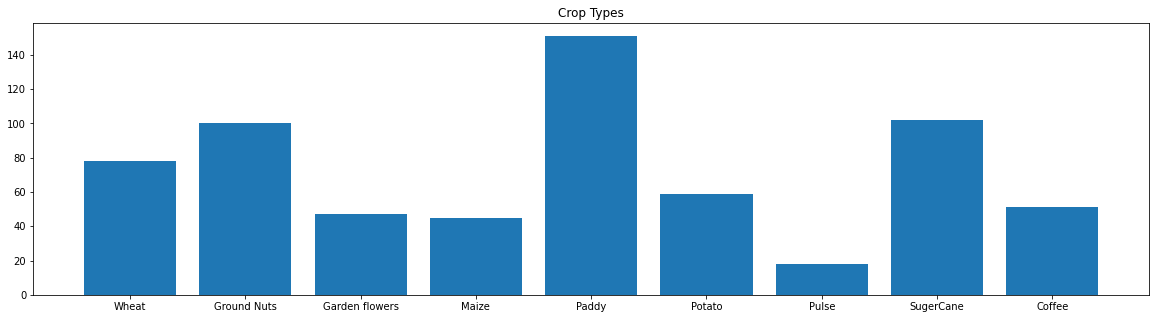

In [17]:
countvals = []
crops = ["Wheat", "Ground Nuts", "Garden flowers", "Maize", "Paddy", "Potato", "Pulse", "SugerCane", "Coffee"]
plt.figure(figsize = (20, 5))
for i in np.unique(df["CropType"]):
  countvals.append(df["CropType"].value_counts()[i])

plt.title("Crop Types")
plt.bar(crops, countvals)
plt.show()

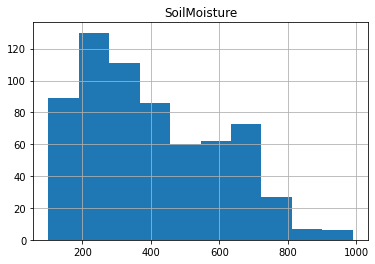

In [18]:
df.hist("SoilMoisture")
plt.show()

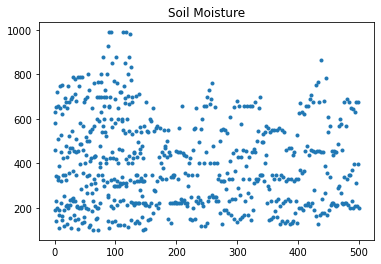

In [19]:
plt.title("Soil Moisture")
plt.plot(df["SoilMoisture"], ".")
plt.show()

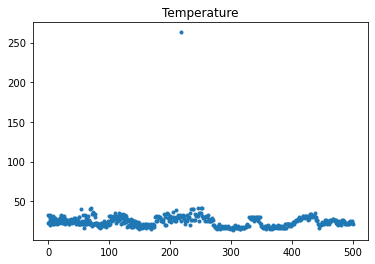

In [20]:
plt.title("Temperature")
plt.plot(df["Temperature"], ".")
plt.show()

There exists an outlier in the temperature feature!

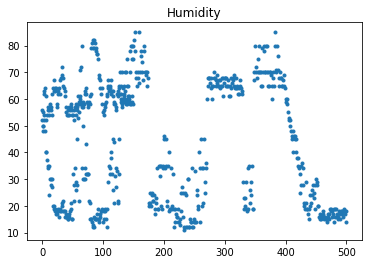

In [21]:
plt.title("Humidity")
plt.plot(df["Humidity"], ".")
plt.show()

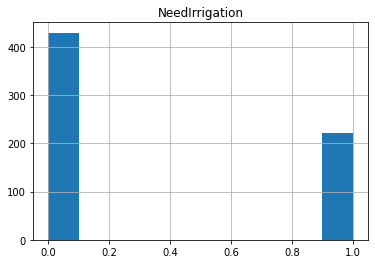

In [22]:
df.hist("NeedIrrigation")
plt.show()

##### Data Pre-Processing of the merged data

The merged dataset needs to be pre-processed in the following ways:
1.   As seen from the visualization of the data, there exists an outlier in the temperature variable which needs to be removed.
2.   The Crop Type varibale needs to be sorted crop code wise.

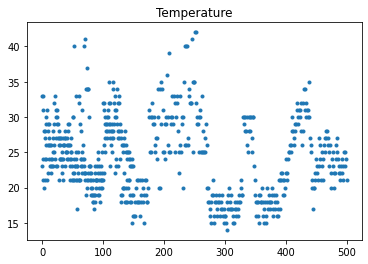

In [23]:
# 1. Removal of outlier in the "Temperature variable"
df.drop(df[(df['Temperature'] > 100)].index, inplace=True)
plt.title("Temperature")
plt.plot(df["Temperature"], ".")
plt.show()

Outliers Removed!

In [24]:
# 2. Sorting of the dataset
df = df.sort_values(by=['CropType'])

In [25]:
# Viewing the pre-processed dataset
df.head()

,CropType,CropDays,SoilMoisture,Temperature,Humidity,NeedIrrigation
63,1,16,230,28,71,0
93,1,74,600,23,15,0
92,1,70,990,24,19,1
91,1,66,700,25,17,1
90,1,65,660,23,15,0


In [26]:
print("Shape of the final Pre-Processed Dataset:", df.shape)

Shape of the final Pre-Processed Dataset: (650, 6)


##### Separation of Features and Labels from the merged dataset

In [27]:
features = df[df.columns[:len(df.columns) - 1]]
labels = df[df.columns[-1]]

print("Shape of the Feature Matrix:", features.shape)
print("Shape of the Label Vector:", labels.shape)

Shape of the Feature Matrix: (650, 5)
Shape of the Label Vector: (650,)


##### Additional EDA on the Merged Dataset

Scatter matrix of all the variables

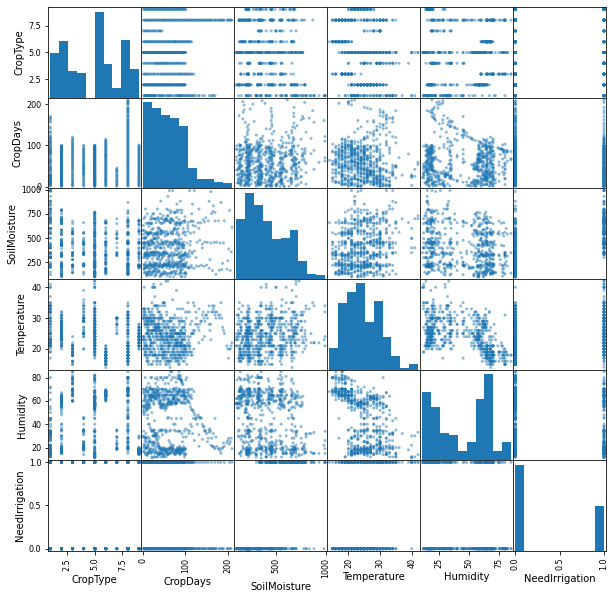

In [28]:
scatter_matrix(df, figsize = (10, 10))
plt.show()

Correlation Heatmap of the variables

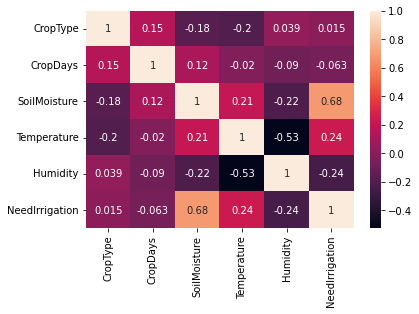

In [29]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

Crop-Type wise Correlation Heatmaps 

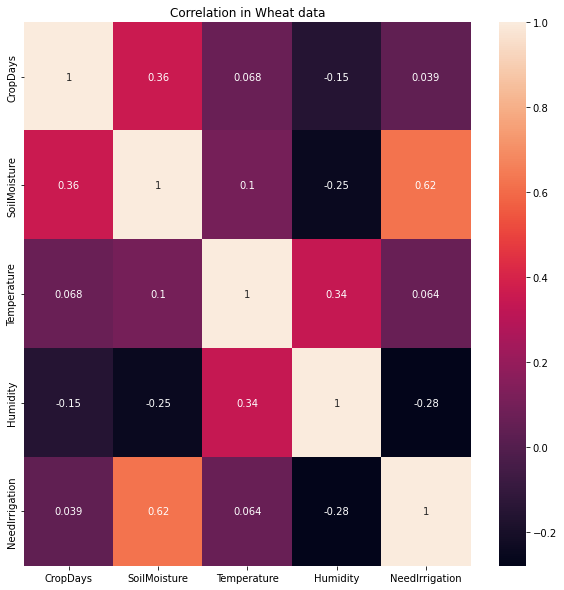

In [30]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 1)]
plt.title(f"Correlation in {crops[0]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

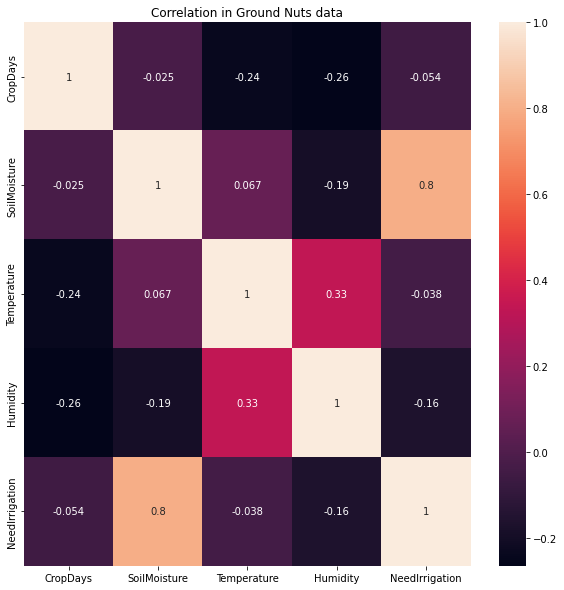

In [31]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 2)]
plt.title(f"Correlation in {crops[1]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

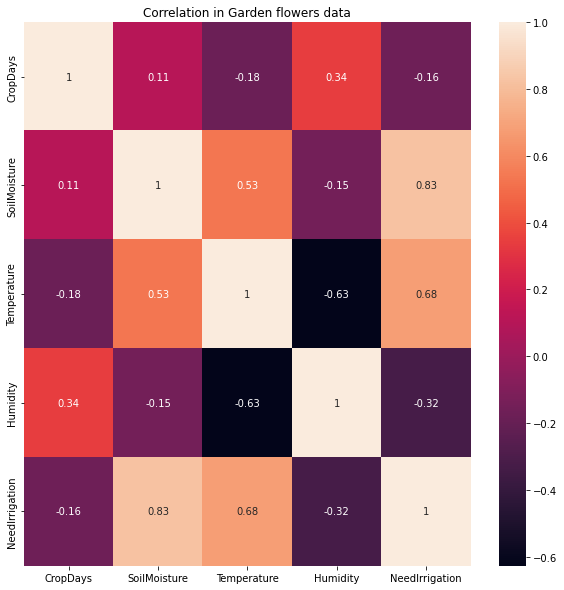

In [32]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 3)]
plt.title(f"Correlation in {crops[2]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

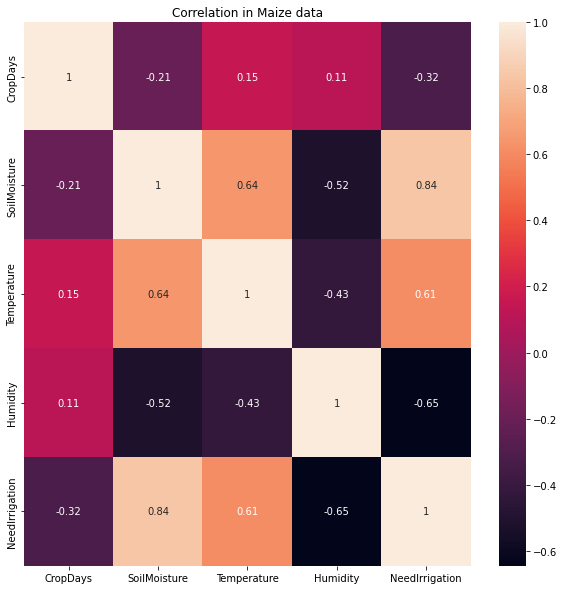

In [33]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 4)]
plt.title(f"Correlation in {crops[3]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

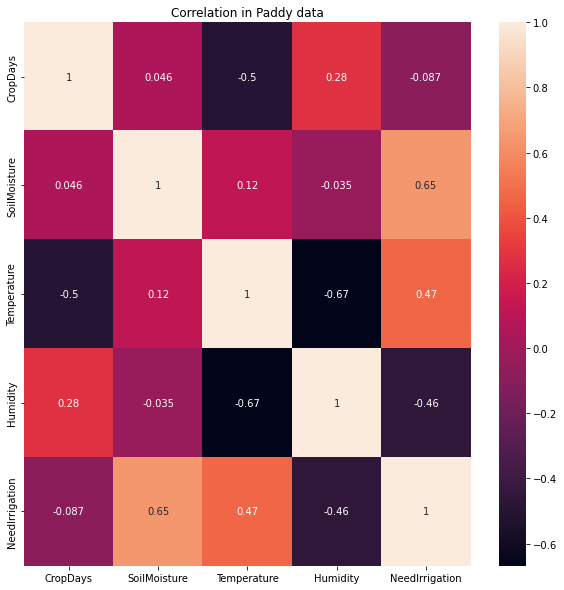

In [34]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 5)]
plt.title(f"Correlation in {crops[4]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

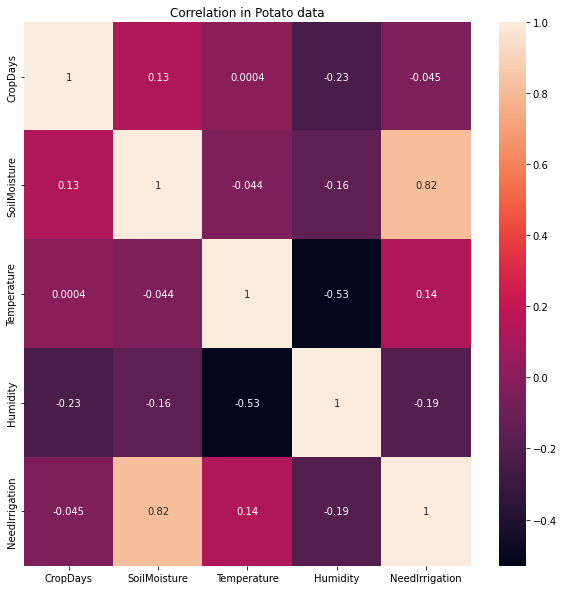

In [35]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 6)]
plt.title(f"Correlation in {crops[5]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

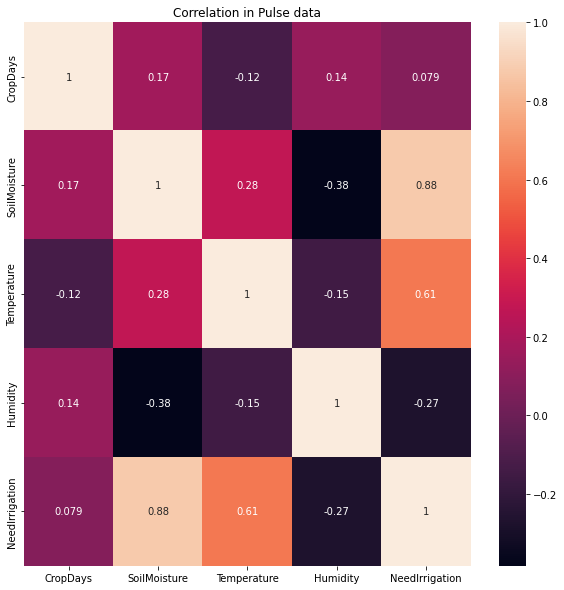

In [36]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 7)]
plt.title(f"Correlation in {crops[6]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

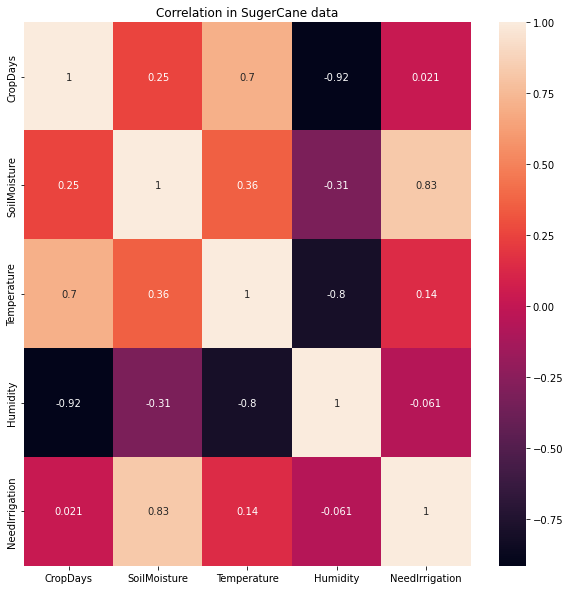

In [37]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 8)]
plt.title(f"Correlation in {crops[7]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()

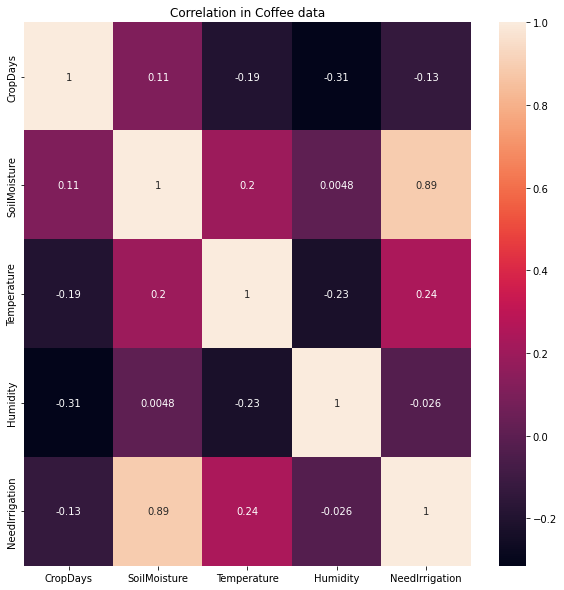

In [38]:
plt.figure(figsize = (10, 10))
currdata = df[(df['CropType'] == 9)]
plt.title(f"Correlation in {crops[8]} data")
sns.heatmap(currdata[currdata.columns[1:]].corr(), annot = True)
plt.show()